<a href="https://colab.research.google.com/github/sharad1naruto/Predicting-Height-using-weight-by-ML/blob/main/height_using_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIM**
THE  MAIN AIM IS PREDICTING THE HEIGHT OF A PERSON USING WEIGHT BY MACHINE LEARNING ALGORITHMS

In [ ]:
import os 
# import warnings
# warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

## Data Preparation

In [ ]:
from locale import D_FMT
data=pd.read_csv("weight-height.csv")
df=data.head()
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df.tail()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Data PreProcessing

In [ ]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [ ]:
min(df.Weight),max(df.Weight)

(162.3104725213, 241.893563180437)

**Duplicate Checking**

In [ ]:
df.shape

(5, 3)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(5, 3)

We are having "0" duplicates in taken dataset

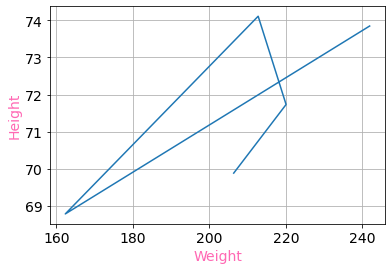

In [ ]:
x=df.Weight
y=df.Height
plt.plot(df.Weight,df.Height)
# using the xlabel and ylabel functions
plt.xlabel("Weight" ,color='hotpink')
plt.ylabel("Height" ,color='hotpink')
plt.show()





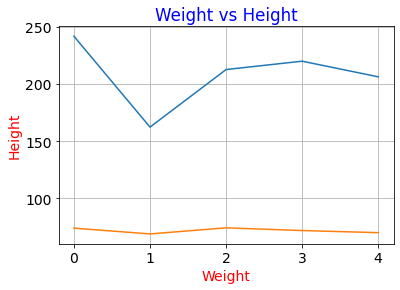

In [ ]:
x=df.Weight
y=df.Height
plt.plot(x)
plt.plot(y)
# using the xlabel and ylabel functions
plt.xlabel("Weight" ,color='red')
plt.ylabel("Height" ,color='red')
plt.title("Weight vs Height" ,color='blue')
plt.show()

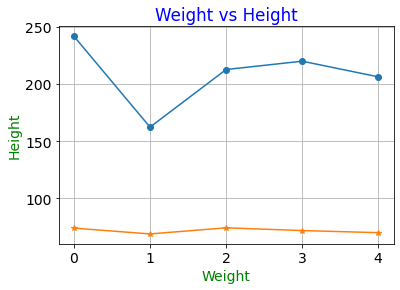

In [ ]:
x=df.Weight
y=df.Height
# using the marker attribute
plt.plot(x ,marker = 'o')
plt.plot(y, marker = '*')
# using the xlabel and ylabel functions
plt.xlabel("Weight" ,color='green')
plt.ylabel("Height" ,color='green')
plt.title("Weight vs Height" ,color='blue')
plt.show()

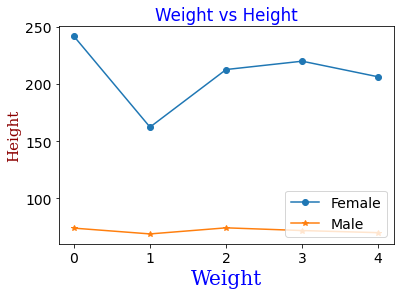

In [ ]:
x=df.Weight
y=df.Height
plt.plot(x ,marker = 'o')
plt.plot(y, marker = '*')
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
# using fontdict functions
plt.xlabel("Weight" ,fontdict = font1)
plt.ylabel("Height" ,fontdict = font2)
plt.title("Weight vs Height" ,color='blue')
plt.grid()
# Function add a legend 
plt.legend(["Female", "Male"], loc ="lower right")
plt.show()

**Training** **The** **Algorithm**

In [ ]:
data.drop(['Gender'], axis=1, inplace=True)

In [ ]:
data

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


Text(0, 0.5, 'Height')

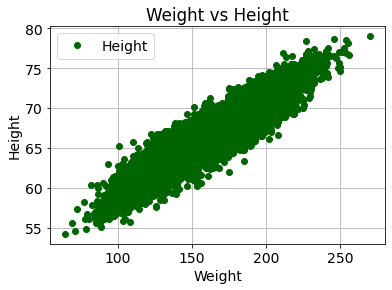

In [ ]:
data.plot(x='Weight', y='Height', style='o', color ='darkgreen')
plt.title('Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')


In [32]:
data.rename(columns={'Height':'Weight','Weight':'Height'},inplace=True)
data

,Gender,Weight,Height
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [35]:
data.drop(['Gender'], axis=1, inplace=True)

In [36]:
data

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [37]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
LinearRegression()
print(regressor.intercept_)
print(regressor.coef_)

-350.1904028560757
[7.70936331]


In [39]:
y_pred = regressor.predict(X_test)
d1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
d1


,Actual,Predicted
0,138.085796,148.789477
1,187.363366,168.435201
2,216.533191,224.318845
3,131.761443,157.702560
4,157.718438,149.733294
...,...,...
1995,189.856786,182.410166
1996,202.906859,203.809260
1997,152.420031,159.175764
1998,170.100647,155.864045


In [40]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))



Mean Absolute Error: 9.662897842061215
Mean Squared Error: 146.5367721395743


In [ ]:
plt.plot(y_test,y_pred)